In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [4]:
#CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                 

In [7]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    'Covid19-dataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 251 images belonging to 3 classes.


In [13]:
validation_generator = train_datagen.flow_from_directory(
    'Covid19-dataset/Test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 66 images belonging to 3 classes.


In [15]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=7,
    epochs=10,
    validation_data = validation_generator,
    validation_steps = 2
)

C:\Users\HP\AppData\Local\Temp\ipykernel_8820\3819594273.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
7/7 [==============================] - 25s 3s/step - loss: 0.3891 - accuracy: 0.2877 - val_loss: -0.1663 - val_accuracy: 0.5156
Epoch 2/10
7/7 [==============================] - 24s 3s/step - loss: -2.2729 - accuracy: 0.4292 - val_loss: -3.3119 - val_accuracy: 0.3125
Epoch 3/10
7/7 [==============================] - 24s 3s/step - loss: -21.3996 - accuracy: 0.4155 - val_loss: -51.0874 - val_accuracy: 0.4219
Epoch 4/10
7/7 [==============================] - 25s 3s/step - loss: -331.5502 - accuracy: 0.4064 - val_loss: -582.4635 - val_accuracy: 0.3125
Epoch 5/10
7/7 [==============================] - 25s 4s/step - loss: -1196.9214 - accuracy: 0.4566 - val_loss: -3843.7910 - val_accuracy: 0.5156
Epoch 6/10
7/7 [==============================] - 26s 4s/step - loss: -8421.5322 - accuracy: 0.4703 - val_loss: -17127.1191 - val_accuracy: 0.3750
Epoch 7/10
7/7 [==============================] - 25s 3s/step - loss: -33041.9297 - accuracy: 0.4384 - val_loss: -52608.1328 - val_accuracy: 0

In [16]:
model.save("model_adv.h5")

C:\Users\HP\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
model.evaluate_generator(train_generator)

C:\Users\HP\AppData\Local\Temp\ipykernel_8820\326654268.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(train_generator)


[-1510104.125, 0.350597620010376]

In [18]:
model.evaluate_generator(validation_generator)

C:\Users\HP\AppData\Local\Temp\ipykernel_8820\3378472596.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(validation_generator)


[-1424232.875, 0.3333333432674408]

In [20]:
model = load_model("model_adv.h5")

In [21]:
import os

In [22]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [23]:
y_actual = []
y_test = []

In [25]:
from PIL import Image
for i in os.listdir("Covid19-dataset/test/Normal/"):
    img = image.load_img("Covid19-dataset/test/Normal/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict(img)
    y_test.append(p[0,0])
    y_actual.append(1)

1/1 [==============================] - 0s 29ms/step


In [26]:
from PIL import Image
for i in os.listdir("Covid19-dataset/test/Covid/"):
    img = image.load_img("Covid19-dataset/test/Covid/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict(img)
    y_test.append(p[0,0])
    y_actual.append(1)

1/1 [==============================] - 0s 37ms/step


In [27]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
import seaborn as sns

In [30]:
cm = confusion_matrix(y_actual,y_test)

<Axes: >

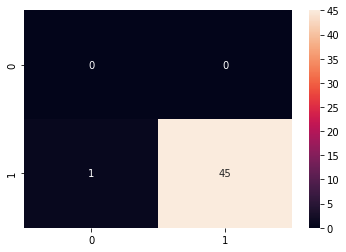

In [31]:
import seaborn as sns
sns.heatmap(cm, cmap=None, annot=True)

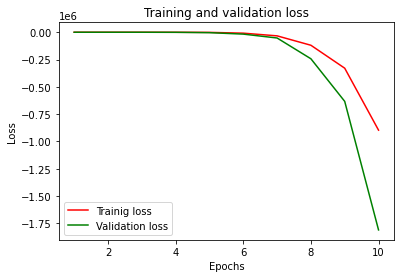

In [33]:
import matplotlib.pyplot as plt
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Trainig loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

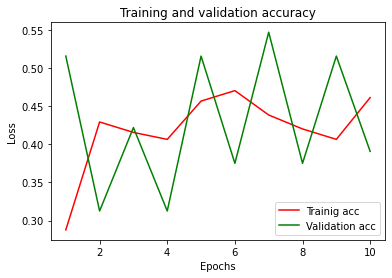

In [34]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Trainig acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
class color:
    GREEN = '\033[92m'
    RED = '\033[91m'

from PIL import Image
j = 0
for i in os.listdir("Covid19-dataset/test/Normal/"):
    j=j+1
    pil_img = Image.open('Covid19-dataset/test/Normal/'+i)
    im = pil_img
    size = (200,200)
    
    #resize image
    out = im.resize(size)
    display(size)
    img = image.load_img("Covid19-dataset/test/Normal/"+i, target_size = (224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict(img)
    print(color.GREEN + 'Radiologist: COVID-19 -ve' + color.GREEN)
    
    if p==0:
        print(color.RED + 'CNN: COVID-19 +ve' + color.RED)
    else:
        print("CNN Model: COVID-19 -ve")
    if (j==5):
        break
        
from PIL import Image
j = 0
for i in os.listdir("Covid19-dataset/test/Covid/"):
    j=j+1
    pil_img = Image.open('Covid19-dataset/test/Covid/'+i)
    im = pil_img
    size = (200,200)
    
    #resize image
    out = im.resize(size)
    display(size)
    img = image.load_img("Covid19-dataset/test/Covid/"+i, target_size = (224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict(img)
    print(color.RED + 'Radiologist: COVID-19 -ve' + color.RED)
    
    if p==0:
        print(color.GREEN + 'CNN: COVID-19 +ve' + color.GREEN)
    else:
        print("CNN Model: COVID-19 -ve")
    if (j==5):
        break

(200, 200)

1/1 [==============================] - 0s 32ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


(200, 200)

1/1 [==============================] - 0s 32ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


(200, 200)

1/1 [==============================] - 0s 40ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


(200, 200)

1/1 [==============================] - 0s 40ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


(200, 200)

1/1 [==============================] - 0s 40ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


(200, 200)

1/1 [==============================] - 0s 40ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


(200, 200)

1/1 [==============================] - 0s 40ms/step
Radiologist: COVID-19 -ve
CNN: COVID-19 +ve


(200, 200)

1/1 [==============================] - 0s 42ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


(200, 200)

1/1 [==============================] - 0s 40ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


(200, 200)

1/1 [==============================] - 0s 41ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve
